In [19]:
# Ячейка 1: Импорт библиотек и настройка
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Для корректного отображения графиков в Jupyter
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Для лучшего качества изображений

Размер матрицы: (531, 413)
Тип данных: uint8
Диапазон значений: [0, 255]
Пример значений:
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


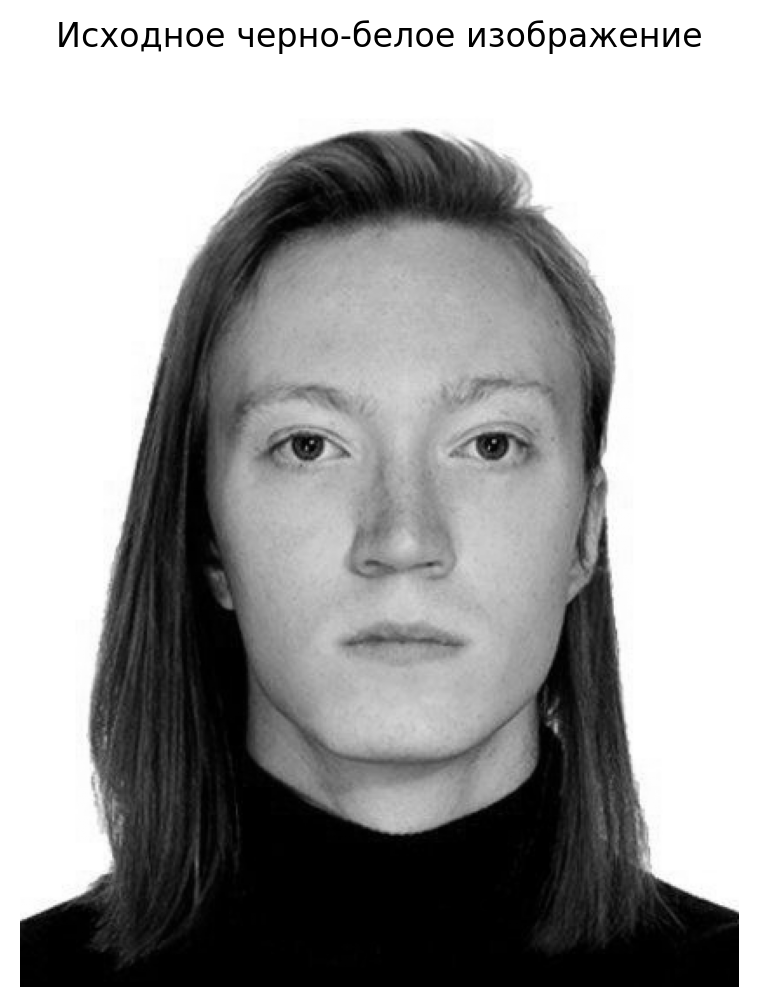

In [20]:
# Ячейка 2: Загрузка и анализ изображения
image = Image.open('1.jpg').convert('L')
image_array = np.array(image)

print(f"Размер матрицы: {image_array.shape}")
print(f"Тип данных: {image_array.dtype}")
print(f"Диапазон значений: [{image_array.min()}, {image_array.max()}]")
print(f"Пример значений:\n{image_array[:5, :5]}")

# Показываем исходное изображение
plt.figure(figsize=(8, 6))
plt.imshow(image_array, cmap='gray')
plt.title('Исходное черно-белое изображение')
plt.axis('off')
plt.show()

Всего сингулярных чисел: 413


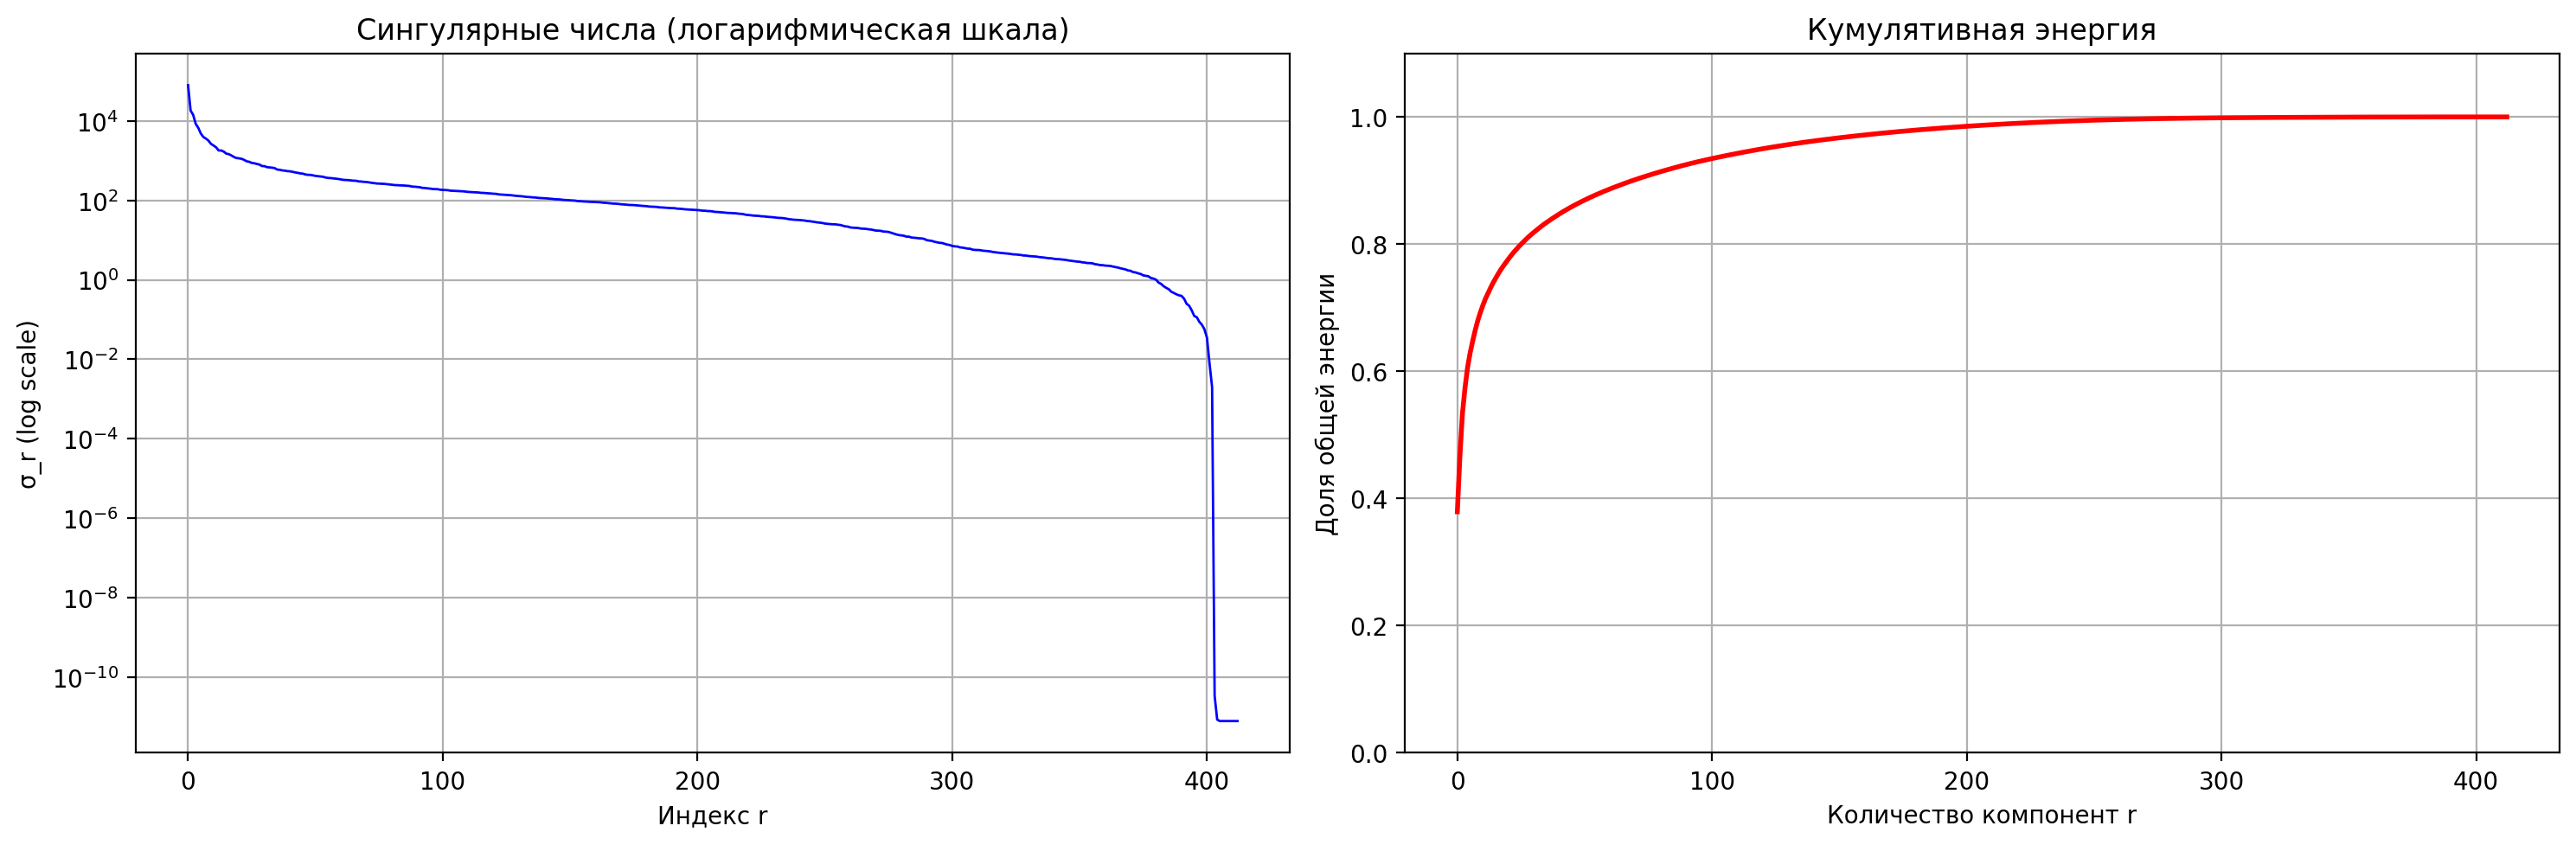

In [21]:
# Ячейка 3: Сингулярное разложение и анализ
# Выполняем SVD
U, S, VT = np.linalg.svd(image_array, full_matrices=False)

total_singular_values = len(S)
print(f"Всего сингулярных чисел: {total_singular_values}")

# Вычисляем кумулятивную энергию
cumulative_energy = np.cumsum(S) / np.sum(S)

# График сингулярных чисел и кумулятивной энергии
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.semilogy(S, 'b-', linewidth=1)
ax1.set_title('Сингулярные числа (логарифмическая шкала)')
ax1.set_xlabel('Индекс r')
ax1.set_ylabel('σ_r (log scale)')
ax1.grid(True)

ax2.plot(cumulative_energy, 'r-', linewidth=2)
ax2.set_title('Кумулятивная энергия')
ax2.set_xlabel('Количество компонент r')
ax2.set_ylabel('Доля общей энергии')
ax2.grid(True)
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

РЕЗУЛЬТАТЫ СЖАТИЯ С ПОМОЩЬЮ SVD
Уровень    r        % энергии    Ошибка Фробениуса   
--------------------------------------------------
10%        41       84.73     % 60288.81            
5%         20       77.08     % 61935.58            
1%         4        57.35     % 61985.15            
0.2%       1        37.91     % 60808.35            


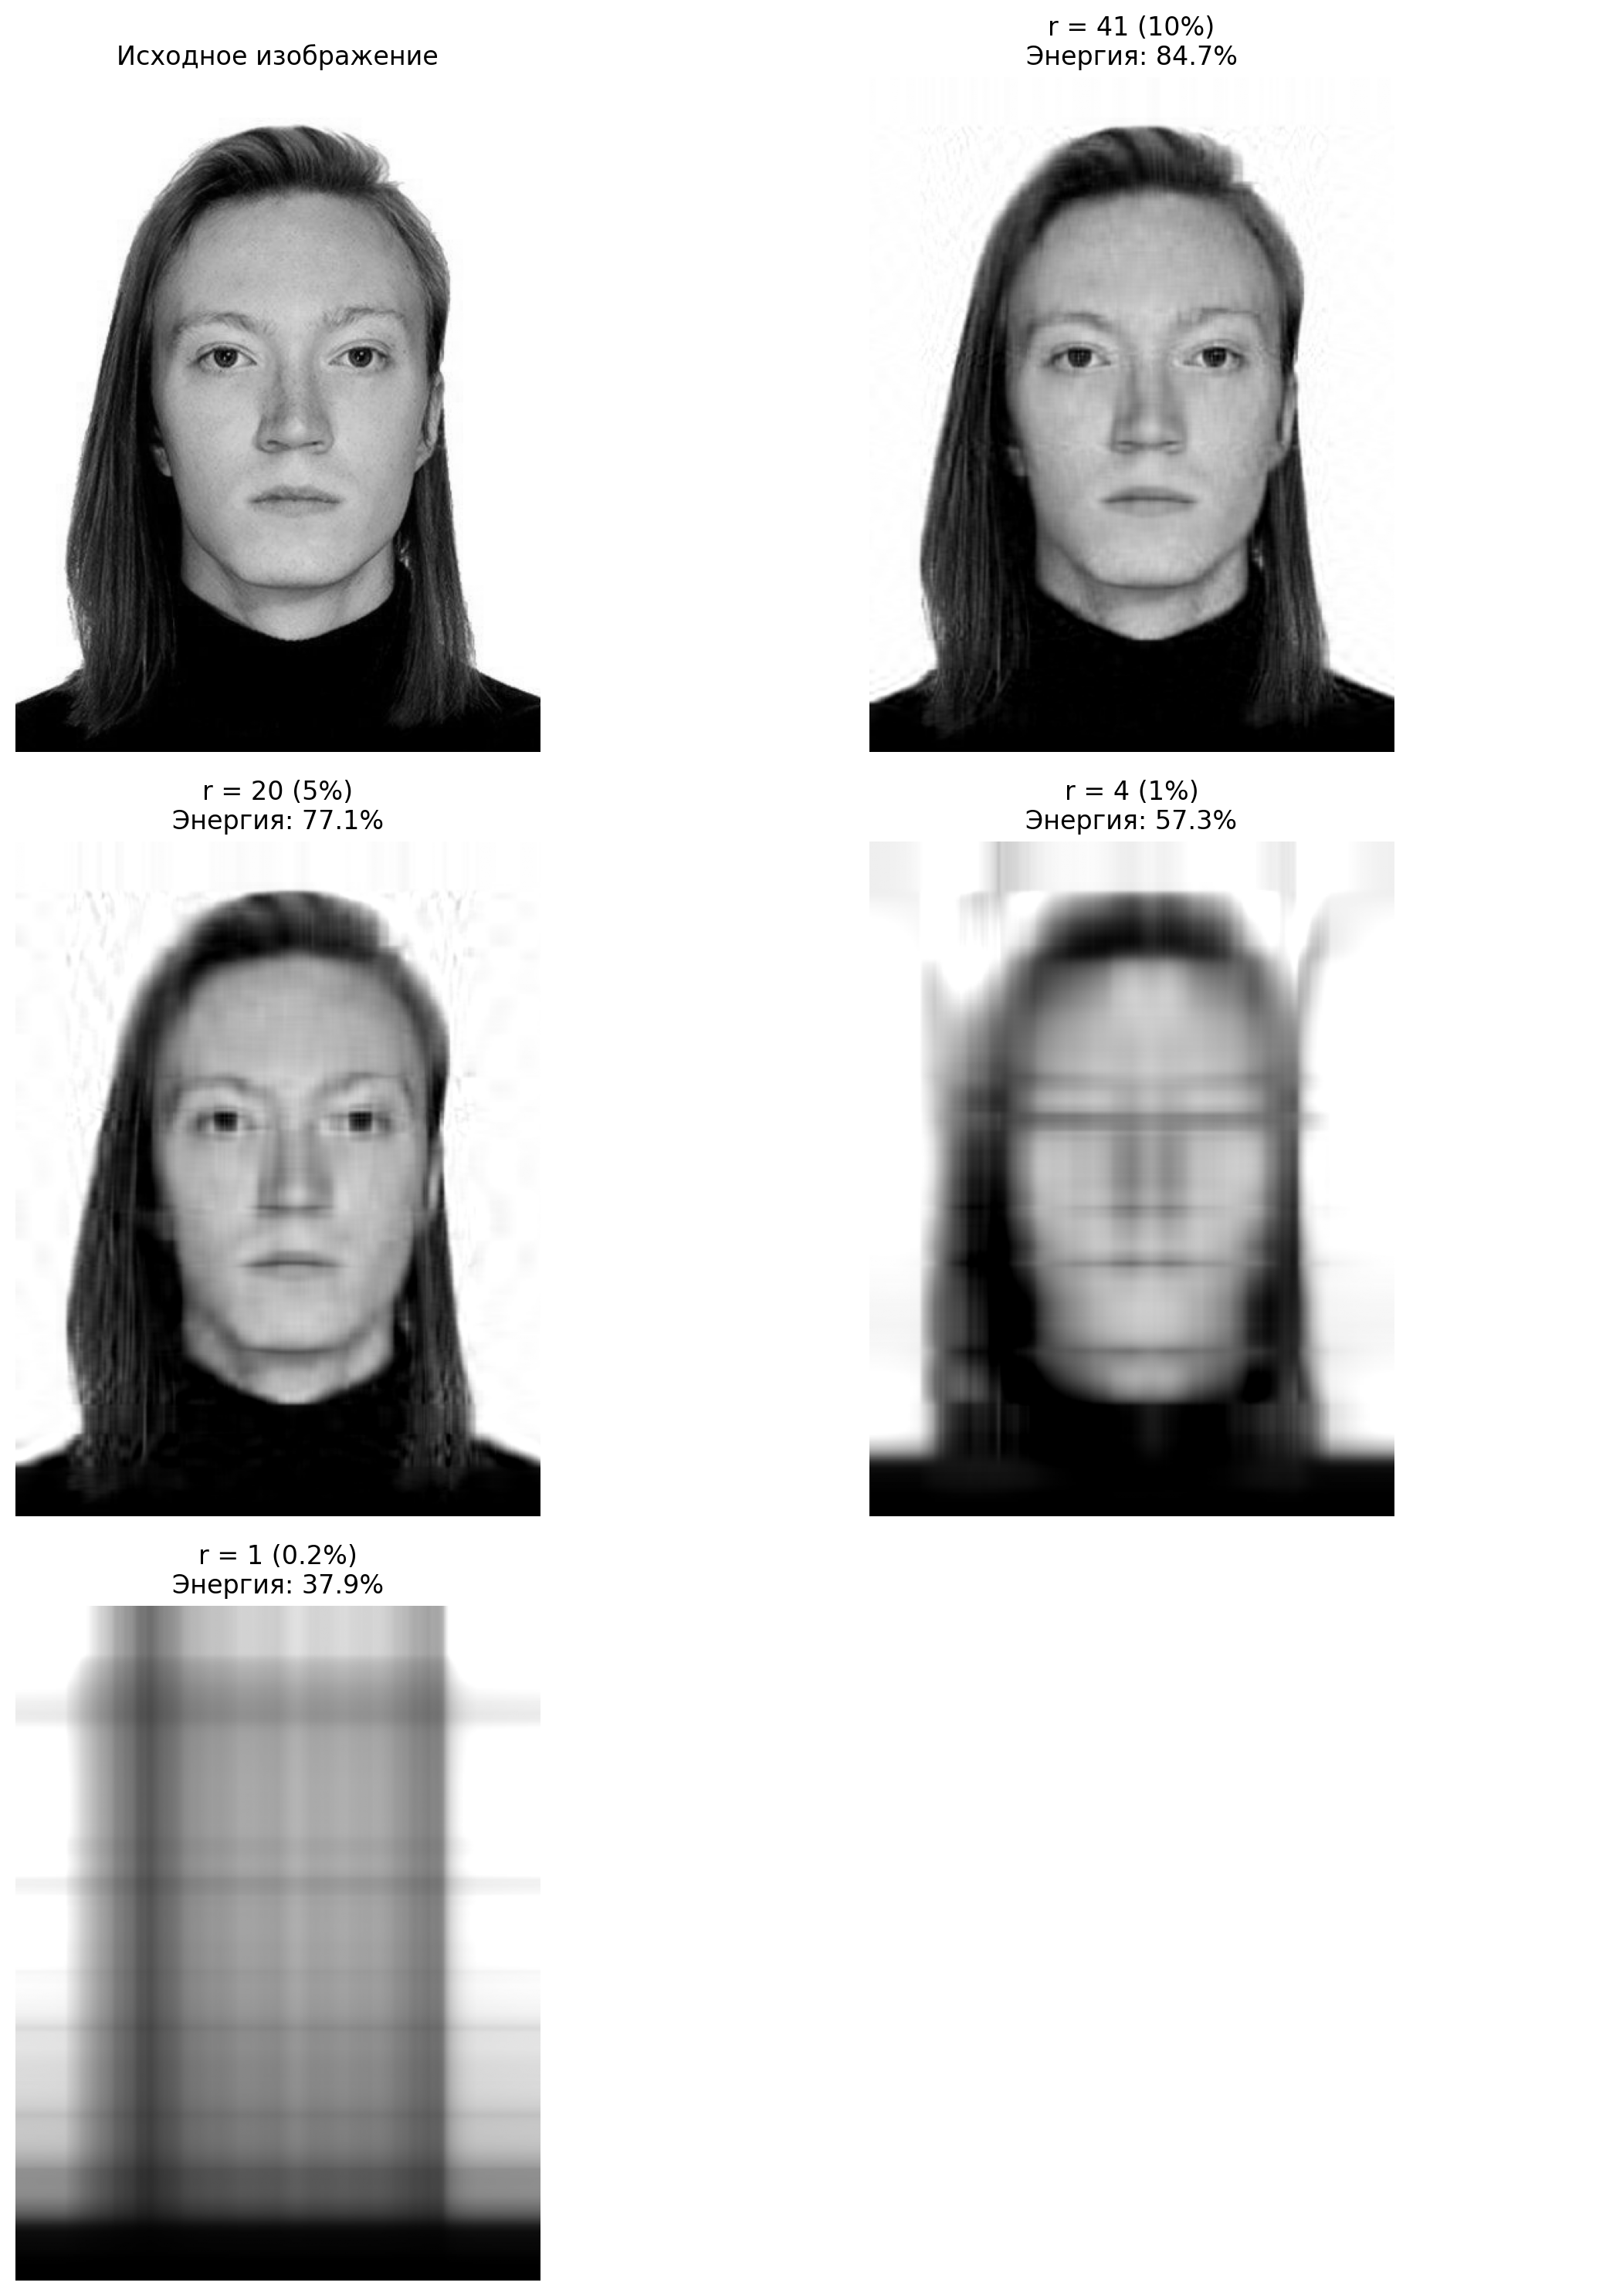

In [22]:
# Ячейка 4: Визуализация сжатия с разными уровнями
compression_ratios = [0.10, 0.05, 0.01, 0.002]
ratios_names = ['10%', '5%', '1%', '0.2%']

print("РЕЗУЛЬТАТЫ СЖАТИЯ С ПОМОЩЬЮ SVD")
print("=" * 50)
print(f"{'Уровень':<10} {'r':<8} {'% энергии':<12} {'Ошибка Фробениуса':<20}")
print("-" * 50)

# ИСПРАВЛЕНИЕ: создаем сетку 3×2 вместо 2×3
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.ravel()  # Преобразуем в одномерный массив для простой индексации

# Исходное изображение
axes[0].imshow(image_array, cmap='gray')
axes[0].set_title('Исходное изображение')
axes[0].axis('off')

# Восстановленные изображения
for i, (ratio, name) in enumerate(zip(compression_ratios, ratios_names)):
    r = max(1, int(total_singular_values * ratio))
    reconstructed = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)
    
    energy_percentage = cumulative_energy[r-1] * 100
    error_norm = np.linalg.norm(image_array - reconstructed, 'fro')
    
    print(f"{name:<10} {r:<8} {energy_percentage:<10.2f}% {error_norm:<20.2f}")
    
    # Используем i+1, так как 0-я позиция занята исходным изображением
    axes[i+1].imshow(reconstructed, cmap='gray')
    axes[i+1].set_title(f'r = {r} ({name})\nЭнергия: {energy_percentage:.1f}%')
    axes[i+1].axis('off')

# Скрываем последнюю (шестую) ячейку если она есть
if len(axes) > len(compression_ratios) + 1:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [23]:
# Ячейка 5: Анализ эффективности сжатия
print("\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ")
print("=" * 40)
print(f"Размер исходной матрицы: {image_array.shape}")
print(f"Общее количество элементов: {image_array.size}")

# Экономия памяти
print("\nЭКОНОМИЯ ПАМЯТИ:")
print(f"{'Уровень':<10} {'r':<8} {'Исходный размер':<18} {'Сжатый размер':<16} {'Коэф. сжатия':<12}")
print("-" * 65)

m, n = image_array.shape
for ratio, name in zip(compression_ratios, ratios_names):
    r = max(1, int(total_singular_values * ratio))
    
    original_size = m * n
    compressed_size = m * r + r + r * n
    compression_ratio = original_size / compressed_size
    
    print(f"{name:<10} {r:<8} {original_size:<18} {compressed_size:<16} {compression_ratio:<10.2f}x")


ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ
Размер исходной матрицы: (531, 413)
Общее количество элементов: 219303

ЭКОНОМИЯ ПАМЯТИ:
Уровень    r        Исходный размер    Сжатый размер    Коэф. сжатия
-----------------------------------------------------------------
10%        41       219303             38745            5.66      x
5%         20       219303             18900            11.60     x
1%         4        219303             3780             58.02     x
0.2%       1        219303             945              232.07    x


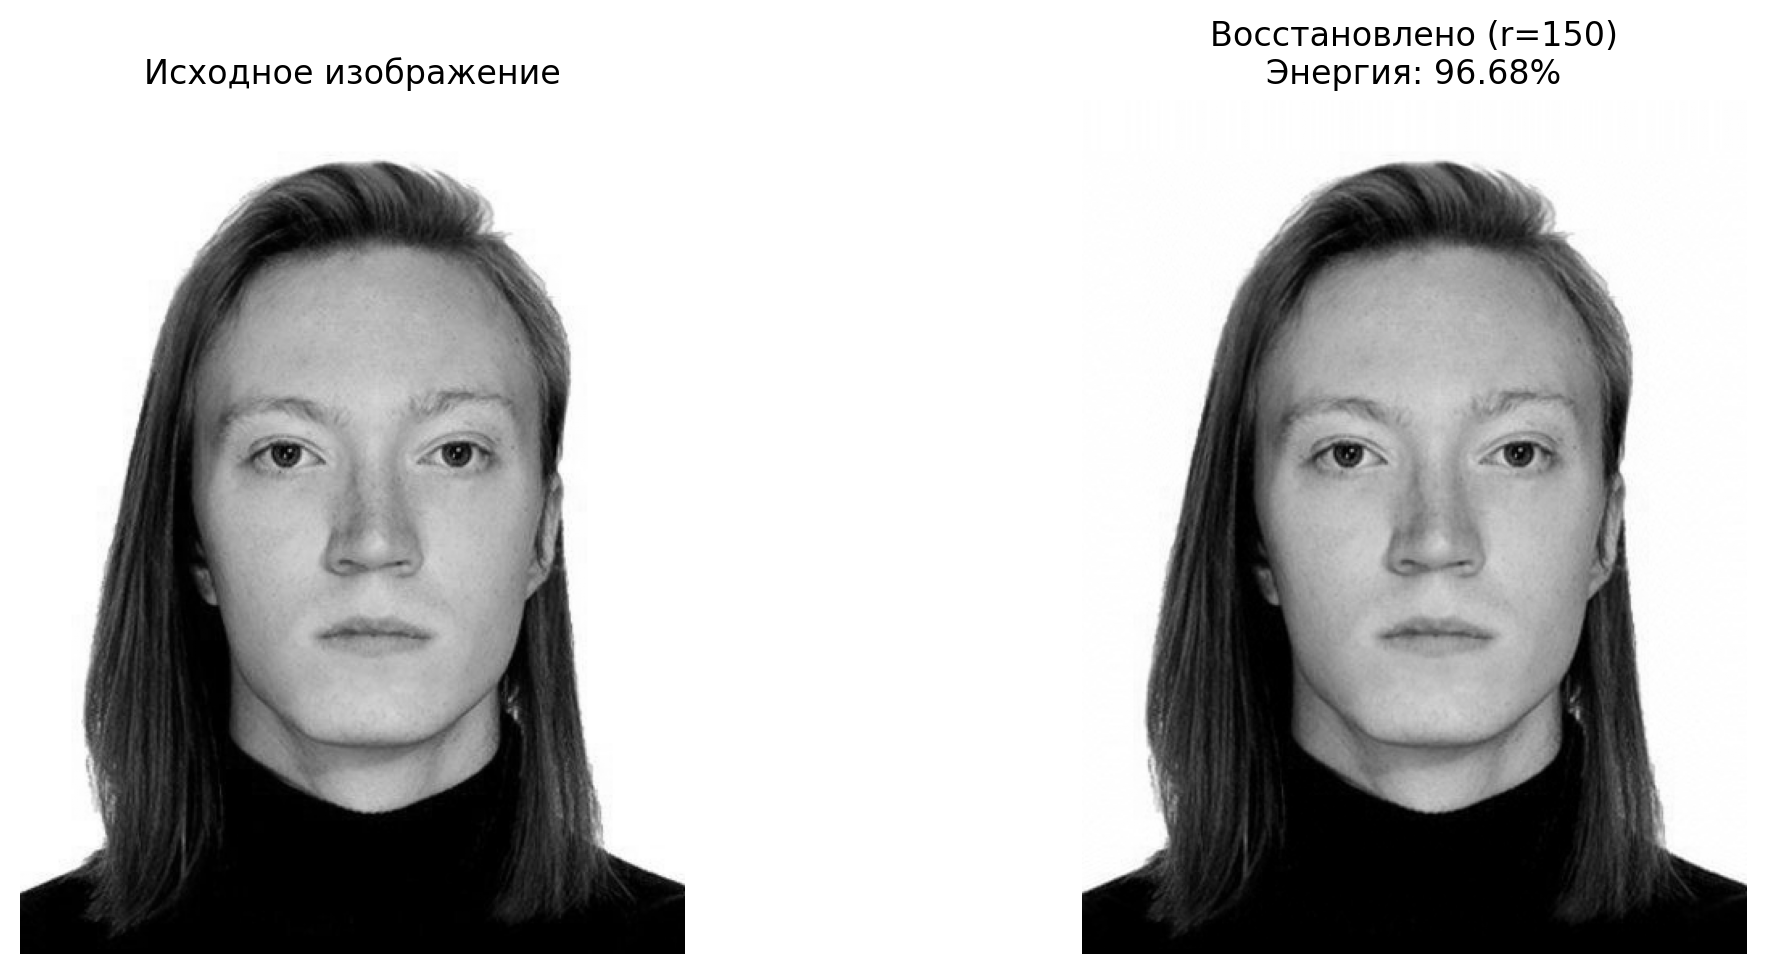

Коэффициент сжатия: 1.55x
Экономия памяти: 35.4%


In [24]:
# Ячейка 6: Интерактивное исследование (опционально)
# Можно добавить интерактивные элементы для исследования разных уровней сжатия

def show_compression(r):
    """Функция для показа изображения с заданным количеством компонент"""
    reconstructed = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)
    
    energy = cumulative_energy[r-1] * 100
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'Восстановлено (r={r})\nЭнергия: {energy:.2f}%')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Вычисляем сжатие
    original_size = m * n
    compressed_size = m * r + r + r * n
    compression_ratio = original_size / compressed_size
    
    print(f"Коэффициент сжатия: {compression_ratio:.2f}x")
    print(f"Экономия памяти: {(1 - compressed_size/original_size)*100:.1f}%")

# Пример использования
show_compression(150)